## For this exercise, you will create a simple neural network example. We'll use a synthetic dataset to predict whether a customer will make a purchase based on two features:

Website visit duration
Number of pages visited.
This is a binary classification problem, and we'll use a small neural network for quick execution. Copy and paste the code into the Jupyter Notebook below. Place each step of code into it's own cell, then execute each cell in order.

# Step 1: Generate Synthetic Data

In [46]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)   # Purchase (1) or not (0)

print(features)
print("____________")
print(labels)



[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]
 [0.97861834 0.79915856]
 [0.46147936 0.78052918]
 [0.11827443 0.63992102]
 [0.14335329 0.94466892]
 [0.52184832 0.41466194]
 [0.26455561 0.77423369]
 [0.45615033 0.56843395]
 [0.0187898  0.6176355 ]
 [0.61209572 0.616934  ]
 [0.94374808 0.6818203 ]
 [0.3595079  0.43703195]
 [0.6976312  0.06022547]
 [0.66676672 0.67063787]
 [0.21038256 0.1289263 ]
 [0.31542835 0.36371077]
 [0.57019677 0.43860151]
 [0.98837384 0.10204481]
 [0.20887676 0.16130952]
 [0.65310833 0.2532916 ]
 [0.46631077 0.24442559]
 [0.15896958 0.11037514]
 [0.65632959 0.13818295]
 [0.19658236 0.36872517]
 [0.82099323 0.09710128]
 [0.83794491 0.09609841]
 [0.97645947 0.4686512 ]
 [0.97676109 0.60484552]
 [0.73926358 0.03918779]
 [0.28280696 0.12019656]
 [0.2961402  0.11872772]


In [48]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels # Adding a new data coloum in Data frame ....

print(df)

     VisitDuration  PagesVisited  Purchase
0         0.548814      0.715189         1
1         0.602763      0.544883         1
2         0.423655      0.645894         1
3         0.437587      0.891773         1
4         0.963663      0.383442         1
..             ...           ...       ...
195       0.062713      0.424032         0
196       0.258684      0.849038         1
197       0.033305      0.958983         0
198       0.355369      0.356707         0
199       0.016329      0.185232         0

[200 rows x 3 columns]


# Step 2: Preprocess the Data

In [51]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

In [53]:
# Step 3: Build and Train the Neural Network

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])




- #### Sequential([...]) → Build layers in a straight sequence. Way to build a neural network layer by layer, in order.

- #### Dense() → fully connected layer. It means every neuron is connected to every neuron in the next layer.

- #### Dense(1, activation='sigmoid') → Output layer for binary classification

## layer 1 := Dense(10, activation='relu', input_shape=(2,))   Hidden Layer
  #### ✅ Dense Layer:
 - Fully connected layer with 10 neurons.
#### ✅ activation='relu':
- Uses the ReLU activation function:
   ###  ReLU(x)=max(0,x)
- Helps model non-linear relationships.
#### ✅ input_shape=(2,):
- Input has 2 features (e.g., [x1, x2]).
- This tells Keras: "Each sample you get will be a vector of length 2."


## layer 2 : =  Dense(1, activation='sigmoid')       Output layer 
 #### ✅ Dense Layer:
- Fully connected output layer with 1 neuron.

#### ✅ activation='sigmoid':
- The sigmoid function squashes the output between 0 and 1:




In [58]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



## 🔧 model.compile(...) — What does it do?
It configures the model for training by setting:
- #### Optimizer: How the model learns
- #### Loss function: What the model tries to minimize
- #### Metrics: What to track during training/testing (like accuracy)



### 1. optimizer='adam'
- stands for |  Adaptive Moment Estimation | .
- It's an optimizer used in training neural networks.
-  An optimizer updates the weights of the model during training to minimize the loss function.
-  Adam combines the benefits of  :  Momentum (which remembers the direction of gradients),   
RMSProp (which adapts learning rates)
So it's:
Fast,
Efficient,
Works well out of the box (default settings are usually good).
- It adjusts learning rate for each weight individually, using:
The mean of past gradients (1st moment) , 
The uncentered variance (2nd moment)


###  2. loss='binary_crossentropy'
This is the loss function used for binary classification problems (e.g., predicting 0 or 1).

🔍 Formula:
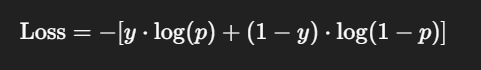
Where:
y = actual label (0 or 1)
p = predicted probability (from sigmoid output)
📌 Goal: Minimize this loss to improve predictions.

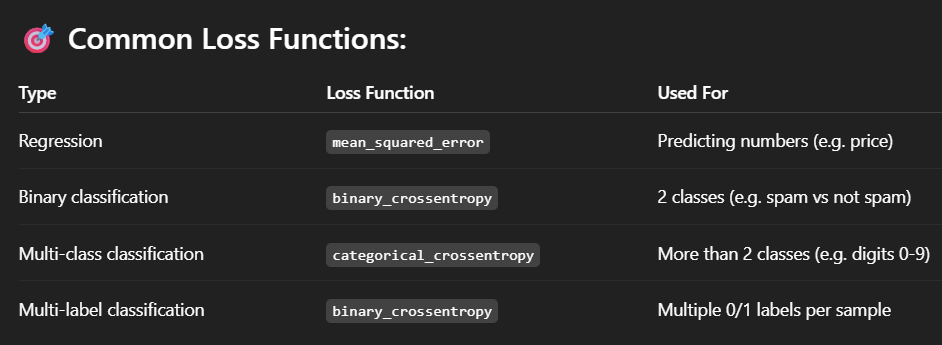


### 3. metrics=['accuracy']
- Tells Keras to track accuracy during training and validation.
- Keras is a high-level deep learning API built on top of low-level frameworks .
- Keras makes it easy to build, train, and evaluate neural networks — without writing complex code.
- 📌 Accuracy = % of correctly predicted labels

In [77]:
# Train the model
print(X_train.shape, y_train.shape)
model.fit(X_train, y_train, epochs=10, batch_size=5)

(160, 2) (160,)
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9710 - loss: 0.1806
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1793
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9762 - loss: 0.1899
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9533 - loss: 0.1774
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9671 - loss: 0.1868
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9636 - loss: 0.1884
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9399 - loss: 0.2240
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9733 - loss: 0.1604
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9500 - loss: 0.1947
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9677 - loss: 0.2073


### 🧠 What is an epoch?
- One epoch = one complete pass through the entire training dataset.
- If you have 100 training samples, then in 1 epoch, the model sees all 100 once.

### 🧠 What is batch size?
- It defines how many samples the model looks at before updating the weights.

In [17]:

print(tf.__version__)

2.19.0


# Step 4: Evaluate the Model

In [83]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8917 - loss: 0.2291
Test Accuracy: 0.8999999761581421
Test Loss: 0.2204223871231079


 ## This exercise introduces you to the basics of building and training a simple neural network with synthetic data. The model predicts customer purchase behavior, a typical business problem, using a fast and straightforward neural network architecture.

### Now i am predicting with my new data ...

In [111]:
nfeatures = np.array([[0.234523 , 0.789374],
            [0.786755 , 0.367682]])



In [113]:
predictions = model.predict(nfeatures)
print("Raw Predictions (probabilities):", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Raw Predictions (probabilities): [[0.65615165]
 [0.7437922 ]]


In [115]:
predicted_classes = (predictions > 0.5).astype(int)
print("Predicted Classes:", predicted_classes)

Predicted Classes: [[1]
 [1]]
